In [438]:
##10 Scraping with beautiful soup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import csv
import time

start_bs = time.time()
def scrape_page(soup, books):
    # Locate the book elements
    book_elements = soup.find_all('div', class_='a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc')

    for book_element in book_elements:
        
        elements = book_element.find_all('div', class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y')
        book_name = elements[0].get_text(strip=True) if len(elements) > 0 else None

        # Extract the author (second occurrence)
        author = elements[1].get_text(strip=True) if len(elements) > 1 else None

        rating = book_element.find('span', class_='a-icon-alt')
        rating = rating.text if rating else None

        customer_rated = book_element.find('span', class_='a-size-small')
        customer_rated = customer_rated.text if customer_rated else None

        price = book_element.find('span', class_='a-size-base a-color-price')
        price = price.text if price else None
        
        books.append({
            'book_name': book_name,
            'author': author,
            'rating': rating,
            'customer_rate': customer_rated,
            'price': price
        })

# Selenium setup
driver = webdriver.Chrome()  # Ensure ChromeDriver is installed
base_url = 'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'
driver.get(base_url)

# Scroll down incrementally with a defined limit
scroll_limit = 10  # Number of scrolls to perform
scroll_pause_time = 1  # Pause time between scrolls
scroll_count = 0  # Initialize scroll count

while scroll_count < scroll_limit:
    driver.execute_script("window.scrollBy(0, 1000);")  # Scroll by 1000 pixels
    time.sleep(scroll_pause_time)
    scroll_count += 1

# Parse the loaded page with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
books = []
scrape_page(soup, books)

# Save data to CSV
with open('amazon_books_bs.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['book_name', 'author', 'rating', 'customer_rate', 'price'])
    writer.writeheader()
    writer.writerows(books)

# Close the browser
driver.quit()

end_bs = time.time()  # End the timer
execution_bs = end_bs - start_bs
print(f"Execution time: {execution_bs:.4f} seconds")
print(f"Scraped {len(books)} books and saved to 'amazon_books_bs.csv'")

Execution time: 21.2176 seconds
Scraped 50 books and saved to 'amazon_books_bs.csv'


In [440]:
## Scraping with lxml

from lxml import html

start_lxml = time.time()

def scrape_page(tree, books):
    # Locate the book elements using XPath
    book_elements = tree.xpath('//div[contains(@class, "a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc")]')

    for book_element in book_elements:
        book_name = book_element.xpath('.//div[contains(@class, "_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")]/text()')
        book_name = book_name[0].strip() if book_name else None

        # Extract the author (second occurrence of the div)
        author = book_element.xpath('.//div[contains(@class, "_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")]/text()')
        author = author[1].strip() if len(author) > 1 else None

        rating = book_element.xpath('.//span[contains(@class, "a-icon-alt")]/text()')
        rating = rating[0].strip() if rating else None

        customer_rated = book_element.xpath('.//span[contains(@class, "a-size-small")]/text()')
        customer_rated = customer_rated[0].strip() if customer_rated else None

        price = book_element.xpath('.//span[contains(@class, "_cDEzb_p13n-sc-price_3mJ9Z")]/text()')
        price = price[0].strip() if price else None

        books.append({
            'book_name': book_name,
            'author': author,
            'rating': rating,
            'customer_rate': customer_rated,
            'price': price
        })

# Selenium setup
driver = webdriver.Chrome()  # Ensure ChromeDriver is installed and in your PATH
base_url = 'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'
driver.get(base_url)

# Scroll down incrementally with a defined limit
scroll_limit = 10  # Number of scrolls to perform
scroll_pause_time = 1  # Pause time between scrolls
scroll_count = 0  # Initialize scroll count

while scroll_count < scroll_limit:
    driver.execute_script("window.scrollBy(0, 1000);")  # Scroll by 1000 pixels
    time.sleep(scroll_pause_time)
    scroll_count += 1

# Parse the loaded page with lxml
tree = html.fromstring(driver.page_source)
books = []
scrape_page(tree, books)

# Save data to CSV
with open('amazon_books_lxml.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['book_name', 'author', 'rating', 'customer_rate', 'price'])
    writer.writeheader()
    writer.writerows(books)

# Close the browser
driver.quit()

end_lxml = time.time()  # End the timer
execution_lxml = end_lxml - start_lxml
print(f"Execution time: {execution_lxml:.4f} seconds")
print(f"Scraped {len(books)} books and saved to 'amazon_books_lxml.csv'")


Execution time: 21.0810 seconds
Scraped 50 books and saved to 'amazon_books_lxml.csv'


In [442]:
## Scraping with regex
import re

# Start the timer
start_re = time.time()

def scrape_page(page_source, books):
    # Defining regular expressions for each data field
    book_pattern = re.compile(r'<div[^>]*class=".*?_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y.*?">(.*?)</div>')
    rating_pattern = re.compile(r'<span[^>]*class=".*?a-icon-alt.*?">(.*?)</span>')
    customer_rated_pattern = re.compile(r'<span[^>]*class=".*?a-size-small.*?">(.*?)</span>')
    price_pattern = re.compile(r'<span[^>]*class=".*?_cDEzb_p13n-sc-price_3mJ9Z.*?">(.*?)</span>')

    # Find all matches for book elements
    book_matches = re.findall(r'<div[^>]*class=".*?a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc.*?">.*?</div>', page_source, re.DOTALL)

    for book_html in book_matches:
        # Extract data using the defined patterns
        book_name = re.findall(book_pattern, book_html)
        book_name = book_name[0].strip() if book_name else None

        author = re.findall(book_pattern, book_html)
        author = author[1].strip() if len(author) > 1 else None

        rating = re.findall(rating_pattern, book_html)
        rating = rating[0].strip() if rating else None

        customer_rated = re.findall(customer_rated_pattern, book_html)
        customer_rated = customer_rated[0].strip() if customer_rated else None

        price = re.findall(price_pattern, book_html)
        price = price[0].strip() if price else None

        # Append extracted data to the books list
        books.append({
            'book_name': book_name,
            'author': author,
            'rating': rating,
            'customer_rate': customer_rated,
            'price': price
        })

# Selenium setup
driver = webdriver.Chrome()  # Ensure ChromeDriver is installed and in your PATH
base_url = 'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'
driver.get(base_url)

# Scroll down incrementally with a defined limit
scroll_limit = 10  # Number of scrolls to perform
scroll_pause_time = 1  # Pause time between scrolls
scroll_count = 0  # Initialize scroll count

while scroll_count < scroll_limit:
    driver.execute_script("window.scrollBy(0, 1000);")  # Scroll by 1000 pixels
    time.sleep(scroll_pause_time)
    scroll_count += 1

# Get the loaded page source
page_source = driver.page_source
books = []

# Call the scraping function
scrape_page(page_source, books)

# Save data to CSV
with open('amazon_books_regex.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['book_name', 'author', 'rating', 'customer_rate', 'price'])
    writer.writeheader()
    writer.writerows(books)

# Close the browser
driver.quit()

# End the timer
end_re = time.time()
execution_re = end_time - start_time

print(f"Execution time: {execution_re:.4f} seconds")
print(f"Scraped {len(books)} books and saved to 'amazon_books_regex.csv'")

Execution time: 24.9898 seconds
Scraped 50 books and saved to 'amazon_books_regex.csv'


In [268]:
##1 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [236]:
##4 Reading csv using Pandas
books_df = pd.read_csv('amazon_books_lxml.csv')

In [218]:
#shape of the dataset
books_df.shape

(50, 5)

In [220]:
#size of the dataset
books_df.size

250

In [224]:
#Head of the dataset
books_df.head()

,book_name,author,rating,customer_rate,price
0,The Psychology of Money,Morgan Housel,4.6 out of 5 stars,"67,673",₹312.00
1,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6 out of 5 stars,264,"₹1,446.43"
2,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8 out of 5 stars,"1,120",₹220.00
3,The Satvic Revolution: 7 Life-Changing Habits ...,Subah Saraf,4.8 out of 5 stars,983,₹323.00
4,Oswaal CBSE Sample Question Papers Class 10 Sc...,Oswaal Editorial Board,4.5 out of 5 stars,43,₹350.00


In [248]:
###6 Checking Null values
books_df.isnull().sum()

book_name        0
author           2
rating           2
customer_rate    0
price            0
dtype: int64

In [250]:
###6 Dropping null values (rows)

books_df = books_df.dropna(axis=0)

In [252]:
###Checking Null values
books_df.isnull().sum()

book_name        0
author           0
rating           0
customer_rate    0
price            0
dtype: int64

In [242]:
### Checking Datatypes of all columns before pre-processing.
print(books_df.dtypes)

book_name        object
author           object
rating           object
customer_rate    object
price            object
dtype: object


In [264]:
###5 Performing EDA on the dataset.
###Pre-processing on columns

###Changing datatype of rating column to float.

books_df['rating'] = books_df['rating'].str[:3].astype(float)

In [254]:
###Changing datatype of customer_rate and removing comma.

books_df['customer_rate'] = books_df['customer_rate'].str.replace(',', '').astype(int)

In [260]:
###Changing datatype of price and removing the '₹' symbol.

books_df['price'] = books_df['price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [266]:
###Checking Datatypes of all columns after pre-processing.
print(books_df.dtypes)

book_name         object
author            object
rating           float64
customer_rate      int32
price            float64
dtype: object


In [280]:
#Head of the dataset
books_df.head()

,book_name,author,rating,customer_rate,price
0,The Psychology of Money,Morgan Housel,4.6,67673,312.00
1,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,264,1446.43
2,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1120,220.00
3,The Satvic Revolution: 7 Life-Changing Habits ...,Subah Saraf,4.8,983,323.00
4,Oswaal CBSE Sample Question Papers Class 10 Sc...,Oswaal Editorial Board,4.5,43,350.00


In [300]:
###7 List the Authors Highest Priced Book (i.e., based on price): show your result (at least top 25 highest priced book) as a data frame as well a Bar diagram.

###Dataframe

top_25_author = books_df[['author', 'price']]
top_25_author = top_25_author.sort_values(by='price', ascending=False).head(25)

# Display result
print(top_25_author)

                           author    price
36                 Professional's  1625.00
6                         Educart  1535.00
1          Oswaal Editorial Board  1446.43
5             PW (Physics Wallah)   999.00
40                     Parmar Sir   899.00
17         Oswaal Editorial Board   594.00
49                   ARPITA KARWA   542.00
8                     James Clear   499.00
16                             PW   483.00
44         Oswaal Editorial Board   439.00
24                    Jeff Kinney   436.00
34       Dr. Manish Raj (MR. Sir)   399.00
7              Wonder House Books   399.00
30         Oswaal Editorial Board   397.00
35    Prerna Kain Srishti Agarwal   374.00
21              Francesc Miralles   368.00
15            Digraj Singh Rajput   359.00
4          Oswaal Editorial Board   350.00
18         Oswaal Editorial Board   350.00
10         Oswaal Editorial Board   350.00
46                  Dale Carnegie   349.00
11                 Prashant Kirad   349.00
32         

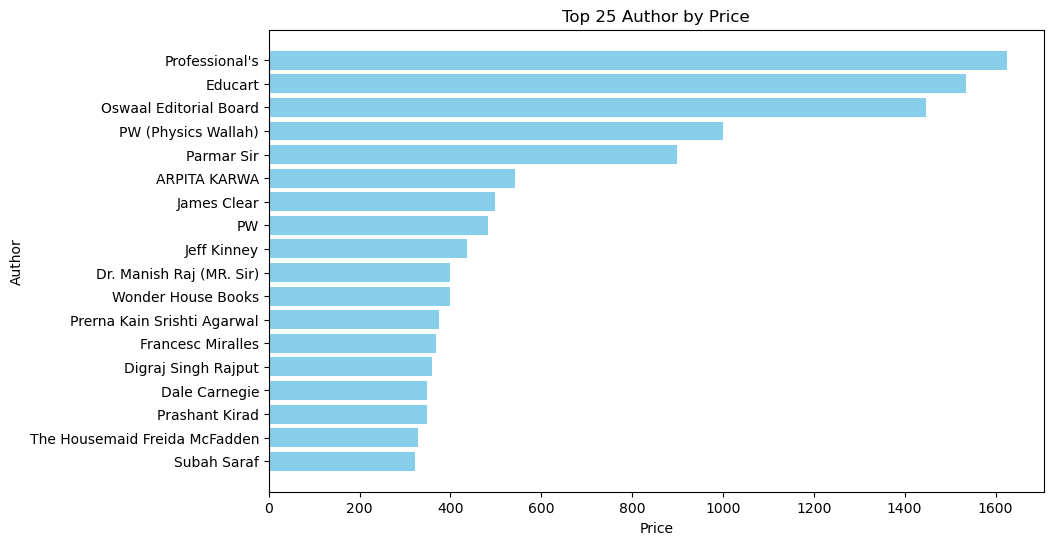

In [308]:
##Barchart
plt.figure(figsize=(10, 6))
plt.barh(top_25_author['author'], top_25_author['price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('Author')
plt.title('Top 25 Author by Price')
plt.gca().invert_yaxis()  # To show the highest-priced author at the top
plt.show()

In [284]:
###8 Show top Rated Books and Authors with respect to the highest customers rating (i.e., based on rating score): Show your result as a data frame as well as a Bar diagram.

###Dataframe

top_rated = books_df[['author', 'rating']]
top_rated = top_rated.sort_values(by='rating', ascending=False).head(10)

# Display result
print(top_rated)

                      author  rating
18    Oswaal Editorial Board     4.8
2                Ravi Mantri     4.8
3                Subah Saraf     4.8
44    Oswaal Editorial Board     4.8
5        PW (Physics Wallah)     4.8
6                    Educart     4.8
26    Oswaal Editorial Board     4.7
43    Oswaal Editorial Board     4.7
34  Dr. Manish Raj (MR. Sir)     4.7
24               Jeff Kinney     4.7


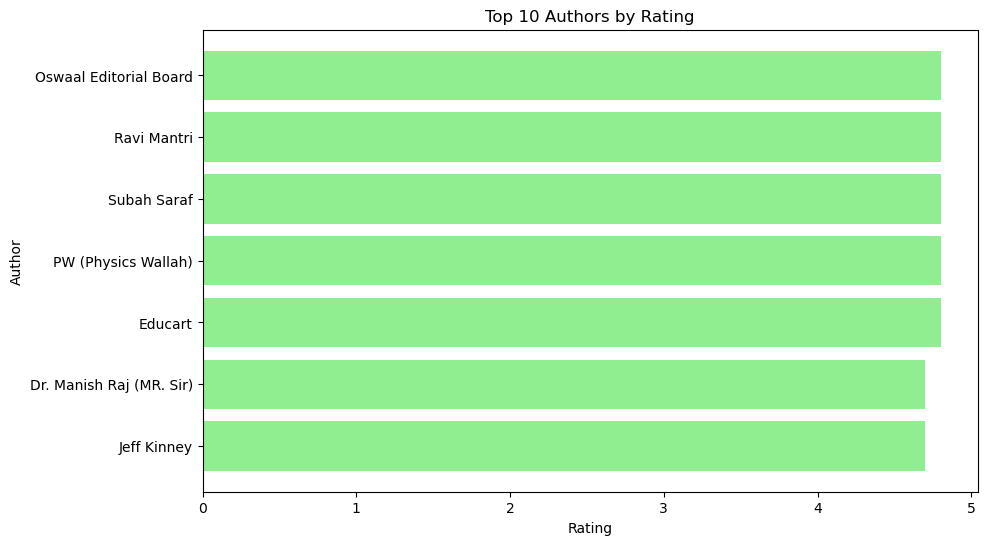

In [298]:
##Barchart
plt.figure(figsize=(10, 6))
plt.barh(top_rated['author'], top_rated['rating'], color='lightgreen')
plt.xlabel('Rating')
plt.ylabel('Author')
plt.title('Top 10 Authors by Rating')
plt.gca().invert_yaxis()  # To show the highest-rated author at the top
plt.show()

In [412]:
###9 Show topmost (10/15) Customer Rated Authors and Books (i.e., based on number of customers): Show your result as a data frame as well as a bokeh.palettes, d3 (https://docs.bokeh.org/en/latest/docs/reference/palettes.html)

##Dataframe

#top 10 most Customer Rated Authors by number of customers

top_10 = books_df[['author','customer_rate']]
top_10 = top_10.groupby(['author'], as_index=False).sum()
top_10_author = top_10.sort_values(by='customer_rate', ascending=False).head(10)

print(top_10_author)

                           author  customer_rate
29  The Housemaid Freida McFadden         197160
31             Wonder House Books         115754
10                    James Clear          98803
12                  Joseph Murphy          84363
15                  Morgan Housel          68398
6               Francesc Miralles          56509
2                   Dale Carnegie          26280
1                   Brianna Wiest          20109
14                    Maple Press          17143
30               Thibaut Meurisse          11297


In [418]:
#9 Bar Chart using bokeh top 10 most Customer Rated Authors by number of customers

from bokeh.palettes import d3
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Bokeh plot for top customer-rated books
output_notebook()
colors = d3['Category10'][10]

p = figure(x_range=top_10_author['author'], height=800, title="Top 10 Most Customer Rated Author",
           toolbar_location=None, tools="")
p.vbar(x=top_10_author['author'], top=top_10_author['customer_rate'],
       width=0.9, color=colors)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Author"
p.yaxis.axis_label = "Number of Ratings"

show(p)

Loading BokehJS ...

In [376]:
#9 top 10 most Customer Rated Books by number of customers
top_10_Books = books_df.sort_values(by='customer_rate', ascending=False).head(10)
top_10_Books = top_10_Books[['book_name','customer_rate']]
print(top_10_Books)

                                            book_name  customer_rate
47  Never Lie : A Totally Gripping Thriller with M...         197160
8                                       Atomic Habits          98803
7   My First Library: Boxset of 10 Board Books for...          80756
31                The Power of Your Subconscious Mind          70906
0                             The Psychology of Money          67673
21     Ikigai: Japanese secret to long and happy life          56509
20  My First Book of Patterns Pencil Control: Patt...          28931
46  World’s Greatest Books For Personal Growth & W...          26280
27  The Mountain Is You: Transforming Self-Sabotag...          20109
12  The Power of Your Subconscious Mind: Original ...          13457


In [432]:
#9 Bar Chart using bokeh top 10 most Customer Rated Books by number of customers
# Bokeh plot for top customer-rated books
output_notebook()
colors = d3['Category10'][10]

p = figure(x_range=top_10_Books['book_name'], height=800, title="Top 10 Most Customer Rated Books",
           toolbar_location=None, tools="")
p.vbar(x=top_10_Books['book_name'], top=top_10_Books['customer_rate'],
       width=0.9, color=colors)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Book"
p.yaxis.axis_label = "Number of Ratings"

show(p)


Loading BokehJS ...

In [446]:
# 10 Comparing three separate web scraping packages and comparing their performance (processing time).

print(f"Beautiful Soup Execution Time: {execution_bs:.4f} seconds")
print(f"lexl Execution Time: {execution_lxml:.4f} seconds")
print(f"Regex Execution Time: {execution_re:.4f} seconds")


Beautiful Soup Execution Time: 21.2176 seconds
lexl Execution Time: 21.0810 seconds
Regex Execution Time: 24.9898 seconds
